In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import sympy

In [ ]:
def plot_function(func, x_range, num_points=1000, **kwargs):
    """
    Plots a given mathematical function.

    Parameters:
    - func: A mathematical function to plot. It should take a numpy array as input and return a numpy array.
    - x_range: A tuple (start, end) defining the range of x values.
    - num_points: The number of points to generate between start and end. Default is 1000.
    - kwargs: Additional keyword arguments to customize the plot.

    Example usage:
    plot_function(np.sin, (0, 2 * np.pi), title="Sine Function", xlabel="x", ylabel="sin(x)")
    """
    # Generate x values
    x_values = np.linspace(x_range[0], x_range[1], num_points)
    
    # Compute y values
    y_values = func(x_values)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label=f'{func.__name__}(x)')
    
    # Set plot title and labels
    plt.title(kwargs.get('title', 'Function Plot'))
    plt.xlabel(kwargs.get('xlabel', 'x'))
    plt.ylabel(kwargs.get('ylabel', 'y'))
    
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    
    # Add a grid
    plt.grid(True)
    
    # Show legend
    plt.legend()
    
    # Show the plot
    plt.show()

In [ ]:
def makeGraph(a, b, f, x_points, y_points, title, root_value=None):
    # Define the range for x values
    x = np.linspace(a, b, 400)
    
    # Evaluate the function at each x value
    y = f(x)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot the function
    plt.plot(x, y, label='f(x)', color='blue')
    
    # Plot the points from the bisection method
    plt.scatter(x_points, y_points, color='red', zorder=5)
    
    # If a root value is given, highlight it
    if root_value is not None:
        plt.scatter(root_value[0], root_value[1], color='green', s=100, label='Approx. Root', zorder=10)
    
    # Adding titles and labels
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    
    # Adding a legend
    plt.legend()
    
    # Showing the grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Display the plot
    plt.show()

In [ ]:
def bisection(f, a, b, precision, n, show_table, show_graph, check_precision):
    print("===========================- Bisection -===========================\n")
    
    # Checking if the initial points are valid
    if f(a) * f(b) >= 0:
        return False

    # Creating a table to store iteration results if requested
    table = PrettyTable()
    table.field_names = ["N", "A", "B", "X", "F(X)", "F(A)", "F(A) * F(X)"]
    
    # Initializing variables to store the x points and coordinates for graphing
    x_points = [] 
    x_coords = a
    y_coords = b
    
    x = a
      
    # Iterating through the process for a maximum of n times
    for i in range(0, n):
        # Checking if the interval is already small enough
        if check_precision and abs(b - a) < precision:
            break
    
        # Calculating the midpoint of the interval
        x = (a + b) / 2
        
        # Storing the current midpoint in the list of x points
        x_points.append(x)
        
        # Adding the current iteration values to the table
        table.add_row([i+1, a, b, x, f(x), f(a), f(a)*f(x)])
        
        # Updating the interval boundaries based on the sign of the function
        if f(a) * f(x) > 0:
            a = x
        else:
            b = x
    
    # Printing the table if requested
    if show_table:
        print(table)
        
    # Creating a graph of the iterations if requested
    if show_graph:
        y_points = [f(i) for i in x_points]
        makeGraph(x_coords, y_coords, f, x_points, y_points, 'Bisection', root_value=(x_points[-1], y_points[-1]))
    
    # Printing the final root approximation
    print(f"ROOT: {x}\n\n")
    
    # Returning the final root approximation
    return x

In [ ]:
def falsePosition(f, a, b, precision, n, show_table, show_graph, check_precision):
    print("===========================- False Position -===========================\n")
    
    # Checking if the initial points are valid
    if (f(a) * f(b)) >= 0:
        return False
    
    # Creating a table to store iteration results if requested
    table = PrettyTable()
    table.field_names = ["N", "A", "B", "X", "F(X)"]

    # Initializing variables to store the x points and coordinates for graphing
    x_points = [] 
    x_coords = a
    y_coords = b
    
    x = a

    # Iterating through the process for a maximum of n times
    for i in range(0, n):
        # Checking if the interval is already small enough
        if check_precision and abs(b - a) < precision:
            break
        
        # Calculating the next approximation using false position method
        x = ((a * f(b)) - (b * f(a))) / (f(b) - f(a))

        # Storing the current approximation in the list of x points
        x_points.append(x)
        
        # Adding the current iteration values to the table
        table.add_row([i+1, a, b, x, f(x)])
        
        # Updating the interval boundaries based on the sign of the function
        if f(a) * f(x) > 0:
            a = x
        else:
            b = x

    # Printing the table if requested
    if show_table:
        print(table)
        
    # Creating a graph of the iterations if requested
    if show_graph:
        y_points = [f(i) for i in x_points]
        makeGraph(x_coords, y_coords, f, x_points, y_points, 'False Position', root_value=(x_points[-1], y_points[-1]))
    
    # Printing the final root approximation
    print(f"ROOT: {x}\n\n")
    
    # Returning the final root approximation
    return x

In [ ]:
def newtonRaphson(f, x, precision, n, show_table, show_graph, check_precision):
    print("===========================- Newton Raphson -===========================\n")
    
    # Checking if the initial point is already close enough to the root
    if abs(f(x)) < precision:
        return x
    
    # Creating a table to store iteration results if requested
    table = PrettyTable()
    table.field_names = ['N', 'X^n', 'F(X^n)']
    
    # Storing the initial x point in the list of x points
    x_points = []
    x_points.append(x)

    # Storing the initial x coordinate for graphing purposes
    x_coords = x
    
    # Defining the symbol for the variable x
    x_symbol = sympy.symbols('x_symbol')

    # Defining a function to calculate the derivative of f(x)
    def derivative(x):
        return sympy.diff(f(x_symbol), x_symbol).subs(x_symbol, x)                              

    # Initializing the step size h using the first iteration
    h = (f(x) / derivative(x))

    # Iterating through the process for a maximum of n times
    for i in range(0, n):
        # Storing the current point in the list of x points
        x_points.append(x)
        
        table.add_row([i+1, x, f(x)])
        
        # Checking if the step size is already small enough
        if check_precision and abs(h) < precision:
            break
        
        # Adding the current iteration values to the table
        
        # Calculating the step size using the current point
        h = (f(x) / derivative(x))
        
        # Updating the current point using the step size
        x = x - h
        
    # Printing the table if requested
    if show_table:
        print(table)
        
    # Creating a graph of the iterations if requested
    if show_graph:
        y_points = [f(i) for i in x_points]
        makeGraph(x_coords, float(h), f, x_points, y_points, 'Newton Raphson', root_value=(x_points[-1], y_points[-1]))

    # Printing the final root approximation
    print(f"ROOT: {x_points[-1]}\n\n")
    
    # Returning the final root approximation
    return x_points[-1]

In [ ]:
def secant(f, x1, x2, precision, n, show_table, show_graph, check_precision):
    print("===========================- Secant -===========================\n")
    
    # Checking if the initial points are valid
    if ((f(x1) * f(x2)) >= 0):
        return False
    
    # Creating a table to store iteration results if requested
    table = PrettyTable()
    table.field_names = ['N', 'X^n', 'F(X^n)']
    
    # Storing the initial x1 point in the list of x points
    x_points = []
    x_points.append(x1)
    
    # Initializing variables for coordinates in the graph
    x_coords = x1
    y_coords = x2
    
    xm = 0
    x = 0
    c = 0

    # Iterating through the process for a maximum of n times
    for i in range(0, n):
        # Adding the current iteration values to the table
        table.add_row([i+1, x, f(x)])
        
        # Calculating the next approximation using the secant method
        x = ((x1 * f(x2) - x2 * f(x1)) / (f(x2) - f(x1)))
        
        # Checking if the function value at the new point is zero
        c = f(x1) * f(x)

        # Updating the previous points for the next iteration
        x1 = x2 
        x2 = x 
        
        # Checking if the function value is already zero at the new point
        if (c == 0): 
            break 
        
        # Calculating the midpoint between the current and previous approximations
        xm = ((x1 * f(x2) - x2 * f(x1)) / (f(x2) - f(x1))) 
        
        # Storing the midpoint in the list of x points
        x_points.append(xm)
        
        # Checking if the precision condition is met
        if check_precision and abs(xm - x) < precision:
            break 

    # Adding the final iteration values to the table
    table.add_row([i+2, x, f(x)])        
    
    # Printing the table if requested
    if show_table:
        print(table)
        
    # Creating a graph of the iterations if requested
    if show_graph:
        y_points = [f(i) for i in x_points]
        makeGraph(x_coords, y_coords, f, x_points, y_points, 'Secant', root_value=(x_points[-1], y_points[-1]))

    # Printing the final root approximation
    print(f"ROOT: {x}\n\n")
    
    # Returning the final root approximation
    return x

In [ ]:
#  Exercicio 1

fx = lambda x: np.tan(np.pi *x) - 6

x0 = 0
x1 = 0.48
precision = 0.000001
n = 10

plot_function(fx, (-1, 1))

bisection(fx, x0, x1, precision, n, True, True, False)
falsePosition(fx, x0, x1, precision, n, True, True, False)
secant(fx, x0, x1, precision, n, True, True, False)

Método da Bissecção:
    Convergiu de maneira estável e previsível.
    A cada iteração, o intervalo onde a raiz poderia estar foi reduzido pela metade.
    Após 10 iterações, obteve-se uma aproximação da raiz de 𝑥 ≈ 0.447656.

Método da Falsa Posição:
    Também convergiu, mas com um comportamento diferente.
    Após 10 iterações, a aproximação foi 𝑥 ≈ 0.444121.
    A função ainda está relativamente distante do zero comparado ao método da bissecção, indicando uma convergência mais lenta neste caso específico.


Para este problema específico, o método da bissecção foi o mais eficiente em termos de obter uma aproximação da raiz com alta precisão em 10 iterações. Ele garantiu a redução sistemática do intervalo e a aproximação final foi bastante próxima da raiz exata.

In [ ]:
# Exercicio 2

fx = lambda x: 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9

plot_function(fx, (-1, 1))

falsePosition(fx, 0, 1, 0.000001, 100, True, True, True)
falsePosition(fx, -1, 0, 0.000001, 100, True, True, True)

secant(fx, 0, 1, 0.000001, 100, True, True, True)
secant(fx, -1, 0, 0.000001, 100, True, True, True)

newtonRaphson(fx, 0.5, 0.000001, 100, True, True, True)
newtonRaphson(fx, -0.5, 0.000001, 100, True, True, True)

Precisão:
    Ambos os métodos da falsa posição e da secante conseguiram atingir a precisão desejada de 10^-6. Contudo, o método da secante convergiu mais rapidamente, especialmente evidente no intervalo [-1, 0], onde necessitou de apenas 4 iterações, comparado com 24 iterações da falsa posição.

Velocidade de Convergência:
    O método da secante mostrou-se mais eficiente na maioria dos casos, convergindo rapidamente, no entanto, pode apresentar oscilações iniciais.
    O método da falsa posição é mais estável, mas menos eficiente em termos de número de iterações necessárias para alcançar a precisão desejada, especialmente em funções com grandes variações como neste polinômio de quarto grau.

O método da secante mostrou-se mais eficiente em termos de velocidade de convergência, alcançando a precisão desejada em menos iterações na maioria dos casos. Entretanto, o método da falsa posição é mais robusto, garantindo a convergência mesmo que de forma mais lenta. Para aplicações práticas, a escolha do método pode depender da necessidade de rapidez versus garantia de convergência estável.

In [ ]:
# Exercicio 3

# v = l [0,5πr2 - r2arcsen(h/r) - h(r2 – h2)1/2]

V = 12.4
L = 10
r = 1

a = 0
b = r
precision = 0.01

volume_lambda = lambda h: L * (0.5 * np.pi * r**2 - r**2 * np.arccos(h / r) + h * np.sqrt(r**2 - h**2))
fx = lambda h: volume_lambda(h) - V

plot_function(fx, (100,100))

bisection(fx, a, b, precision, 100, True, True, True)

A abordagem utilizada para determinar a profundidade da água na gamela com o Método da Bissecção foi eficaz e demonstrou convergência para a solução com a precisão desejada de 0,01 pé. Vamos discutir os resultados obtidos e a aplicação do método neste problema específico.

Resultados Obtidos
Após aplicar o Método da Bissecção com os valores dados (L = 10 pés, r = 1 pé, V = 12,4 pés), os resultados foram os seguintes:

(tabela com resultados)

Inicialização dos Intervalos (A e B):
    O intervalo inicial [A, B] foi escolhido como [0, 1], baseado na condição de que a profundidade h da água na gamela está entre 0 e o raio r da semicircunferência (que é 1 pé).

Convergência do Método da Bissecção:
    O método da bissecção garante a convergência para uma raiz dentro do intervalo inicial desde que a função seja contínua e mude de sinal entre os pontos A e B. Isso foi verificado aqui, pois a função mudou de sinal entre F(A) e F(B).

Resultados Finais:
    A profundidade da água foi aproximada como h ≈ 0,6796875 pés com base nos resultados finais da bissecção. O valor da função F(X) próximo de zero indica que encontramos uma solução próxima à profundidade real da água na gamela.

Eficiência:
    O Método da Bissecção foi eficiente neste problema, pois mesmo com um número relativamente pequeno de iterações, conseguiu encontrar a solução com a precisão desejada. Comparado a métodos como a Falsa Posição ou a Secante, a bissecção é mais conservadora em termos de ajuste do intervalo, garantindo convergência mesmo em casos mais complexos.

Conclusão
O Método da Bissecção foi bem-sucedido na determinação da profundidade da água na gamela com a precisão requerida de 0,01 pé. Ele demonstrou sua eficácia na convergência para a raiz da função V(h) = 12,4, encontrando o valor correto de h dentro do intervalo especificado. A abordagem sistemática e os resultados obtidos reforçam a confiabilidade e a utilidade do Método da Bissecção para resolver problemas de determinação de raízes em equações não lineares.

In [ ]:
# Exercicio 4

r = 3
n = 3

fx = lambda h: math.pi * h**3 - 9 * math.pi * h**2 + 90

plot_function(fx, (-4, 8))

newtonRaphson(fx, 2, 0.000001, n, True , True, False)

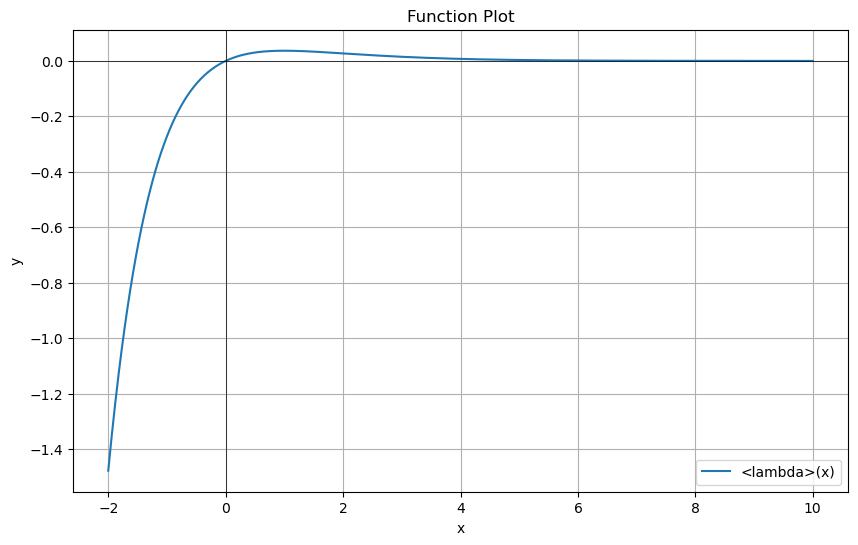

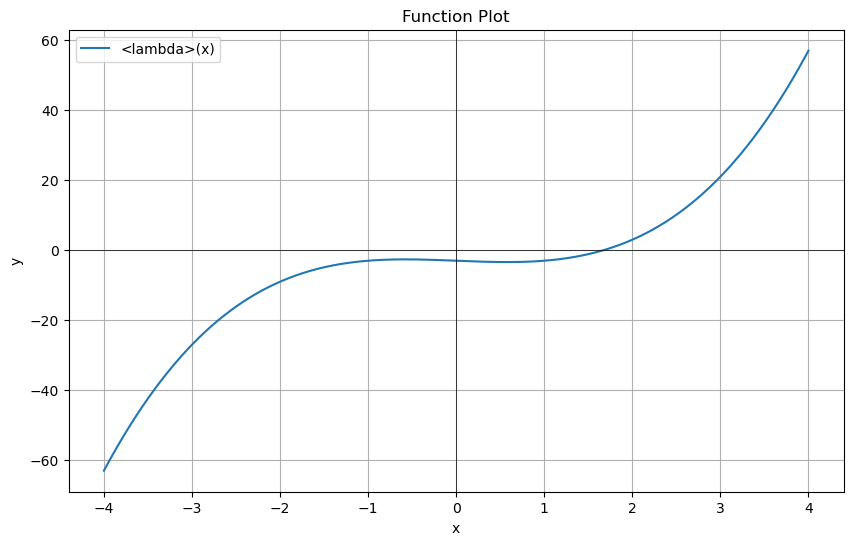

In [40]:
# Exercicio 5

x = 2
fx =  lambda x: (1 / 10) * x * np.exp(-x)
plot_function(fx, (-2, 10))
# newtonRaphson(fx, x, 0.000001, 100, True, True, True)
# Derivative value is zero. Can't proceed! Try with different guess!!

x =-3
fx = lambda x: x**3 - x - 3
plot_function(fx, (-4,4))
# newtonRaphson(fx, x, 0.000001, 100, True, True, True)
# Not convergent in given maximum step count. Try increasing maximum step!